# Vibrato Monte Carlo & Automatic differentiation

The aim of this notebook is to be able to plot all the relevant figures for tests and for the paper

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def savefig(filename):
    plt.savefig('{}.pdf'.format(filename))

In [3]:
# Figures configuration
width = 7
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


## Vanilla Option BlackScholes

### Premium tests

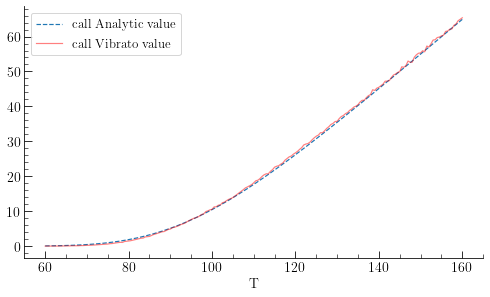

In [4]:
call_vanilla_premium_analytic = pd.read_csv('datasets/call_analytic_premium.csv', 
                                            header=None, names=['T', 'call Analytic value'], 
                                            sep=';', index_col=0)
call_vanilla_premium_vibrato = pd.read_csv('datasets/call_vibrato_premium.csv', 
                                            header=None, names=['T', 'call Vibrato value'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_vanilla_premium_analytic.plot(ax=ax, ls='--');
call_vanilla_premium_vibrato.plot(ax=ax, color='red', alpha=.5);

### Delta tests

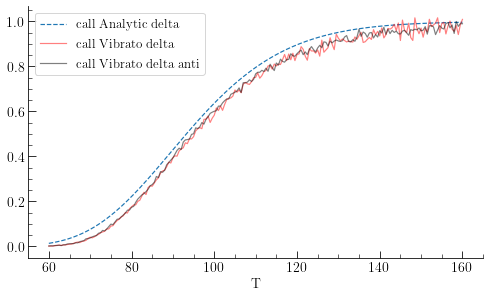

In [5]:
call_vanilla_delta_analytic = pd.read_csv('datasets/call_analytic_delta.csv', 
                                            header=None, names=['T', 'call Analytic delta'], 
                                            sep=';', index_col=0)
call_vanilla_delta_vibrato = pd.read_csv('datasets/call_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)
call_vanilla_delta_vibrato_anti = pd.read_csv('datasets/call_vibrato_delta_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato delta anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_delta_analytic.plot(ax=ax, ls='--');
call_vanilla_delta_vibrato.plot(ax=ax, color='red', alpha=.5);
call_vanilla_delta_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

### Vega tests

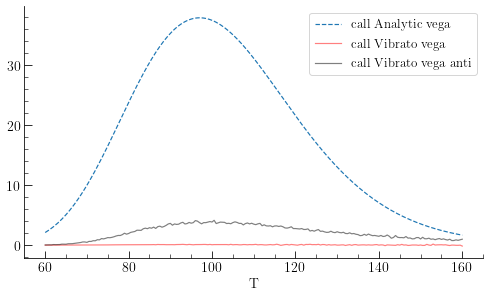

In [6]:
call_vanilla_vega_analytic = pd.read_csv('datasets/call_analytic_vega.csv', 
                                            header=None, names=['T', 'call Analytic vega'], 
                                            sep=';', index_col=0)
call_vanilla_vega_vibrato = pd.read_csv('datasets/call_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)
call_vanilla_vega_vibrato_anti = pd.read_csv('datasets/call_vibrato_vega_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vega anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_vega_analytic.plot(ax=ax, ls='--');
call_vanilla_vega_vibrato.plot(ax=ax, color='red', alpha=.5);
call_vanilla_vega_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

### Rho tests

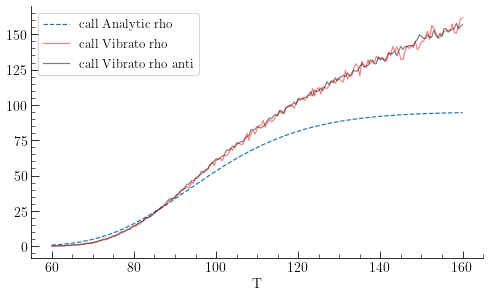

In [7]:
call_vanilla_rho_analytic = pd.read_csv('datasets/call_analytic_rho.csv', 
                                            header=None, names=['T', 'call Analytic rho'], 
                                            sep=';', index_col=0)
call_vanilla_rho_vibrato = pd.read_csv('datasets/call_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)
call_vanilla_rho_vibrato_anti = pd.read_csv('datasets/call_vibrato_rho_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato rho anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_rho_analytic.plot(ax=ax, ls='--');
call_vanilla_rho_vibrato.plot(ax=ax, color='red', alpha=.5);
call_vanilla_rho_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

# Digital option BlackScholes:

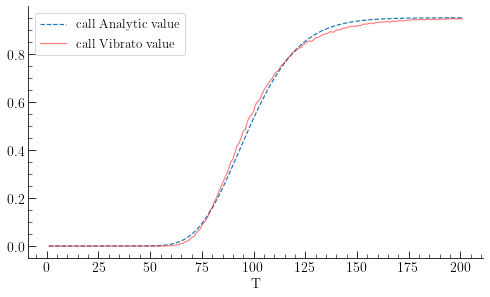

In [8]:
digicall_vanilla_premium_analytic = pd.read_csv('datasets/digicall_analytic_premium.csv', 
                                            header=None, names=['T', 'call Analytic value'], 
                                            sep=';', index_col=0)
digicall_vanilla_premium_vibrato = pd.read_csv('datasets/digicall_vibrato_premium.csv', 
                                            header=None, names=['T', 'call Vibrato value'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
digicall_vanilla_premium_analytic.plot(ax=ax, ls='--');
digicall_vanilla_premium_vibrato.plot(ax=ax, color='red', alpha=.5);

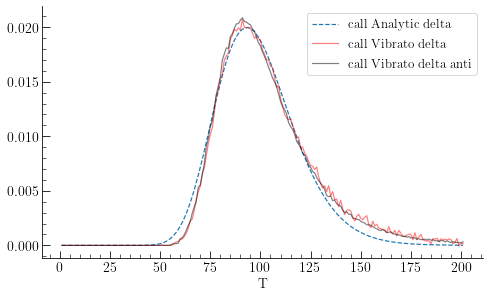

In [9]:
digicall_vanilla_delta_analytic = pd.read_csv('datasets/digicall_analytic_delta.csv', 
                                            header=None, names=['T', 'call Analytic delta'], 
                                            sep=';', index_col=0)
digicall_vanilla_delta_vibrato = pd.read_csv('datasets/digicall_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)
digicall_vanilla_delta_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_delta_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato delta anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_delta_analytic.plot(ax=ax, ls='--');
digicall_vanilla_delta_vibrato.plot(ax=ax, color='red', alpha=.5);
digicall_vanilla_delta_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

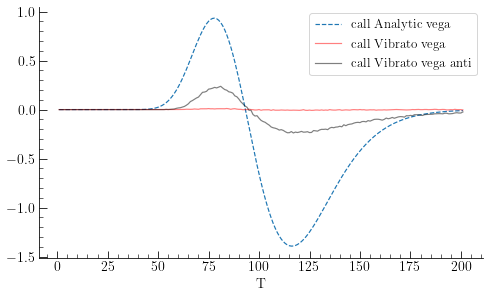

In [10]:
digicall_vanilla_vega_analytic = pd.read_csv('datasets/digicall_analytic_vega.csv', 
                                            header=None, names=['T', 'call Analytic vega'], 
                                            sep=';', index_col=0)
digicall_vanilla_vega_vibrato = pd.read_csv('datasets/digicall_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)
digicall_vanilla_vega_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_vega_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vega anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_vega_analytic.plot(ax=ax, ls='--');
digicall_vanilla_vega_vibrato.plot(ax=ax, color='red', alpha=.5);
digicall_vanilla_vega_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

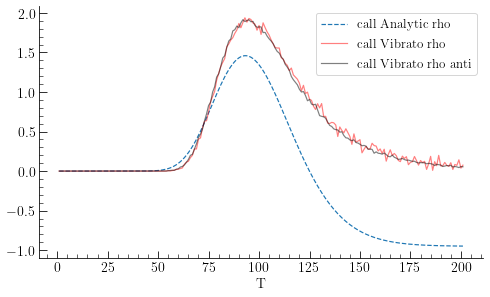

In [11]:
digicall_vanilla_rho_analytic = pd.read_csv('datasets/digicall_analytic_rho.csv', 
                                            header=None, names=['T', 'call Analytic rho'], 
                                            sep=';', index_col=0)
digicall_vanilla_rho_vibrato = pd.read_csv('datasets/digicall_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)
digicall_vanilla_rho_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_rho_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato rho anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_rho_analytic.plot(ax=ax, ls='--');
digicall_vanilla_rho_vibrato.plot(ax=ax, color='red', alpha=.5);
digicall_vanilla_rho_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

## Vanilla Options Heston

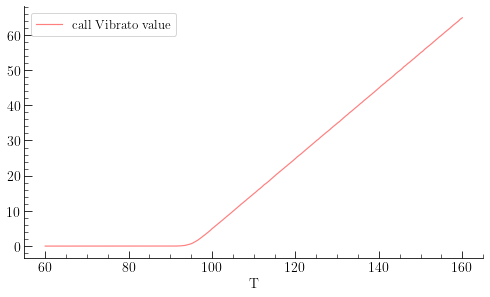

In [18]:
call_heston_premium_vibrato = pd.read_csv('datasets/call_heston_vibrato_premium.csv', 
                                            header=None, names=['T', 'call Vibrato value'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_heston_premium_vibrato.plot(ax=ax, color='red', alpha=.5);

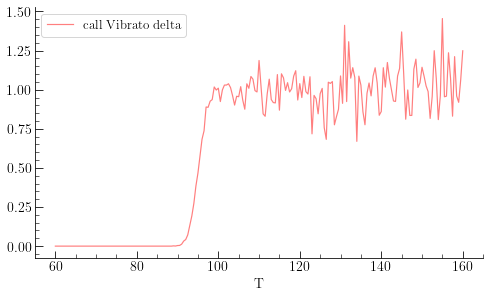

In [20]:
call_heston_delta_vibrato = pd.read_csv('datasets/call_heston_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_heston_delta_vibrato.plot(ax=ax, color='red', alpha=.5);

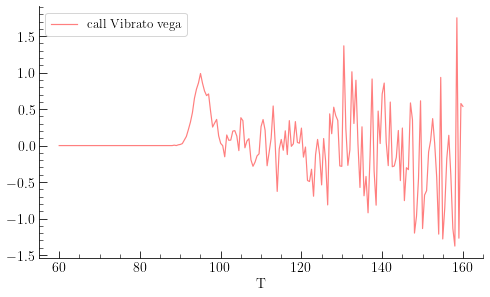

In [21]:
call_heston_vega_vibrato = pd.read_csv('datasets/call_heston_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_heston_vega_vibrato.plot(ax=ax, color='red', alpha=.5);

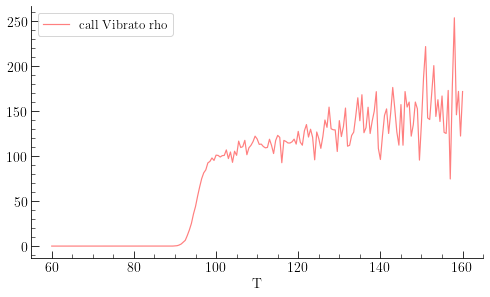

In [22]:
call_heston_rho_vibrato = pd.read_csv('datasets/call_heston_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_heston_rho_vibrato.plot(ax=ax, color='red', alpha=.5);

## Performance plots

### Delta

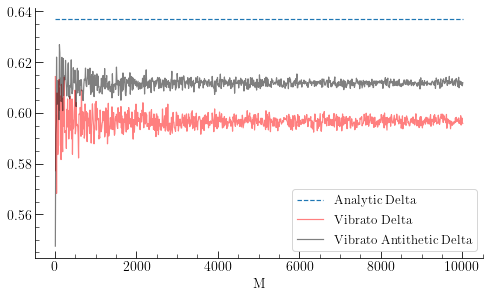

In [13]:
perf_delta_analytic = pd.read_csv('datasets/perf_delta_analytic.csv', 
                                            header=None, names=['M', 'Analytic Delta'], 
                                            sep=';', index_col=0)
perf_delta_vibrato = pd.read_csv('datasets/perf_delta_vibrato.csv', 
                                            header=None, names=['M', 'Vibrato Delta'], 
                                            sep=';', index_col=0)
perf_delta_vibrato_anti = pd.read_csv('datasets/perf_delta_vibrato_anti.csv', 
                                            header=None, names=['M', 'Vibrato Antithetic Delta'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
perf_delta_analytic.plot(ax=ax, ls='--');
perf_delta_vibrato.plot(ax=ax, color='red', alpha=.5);
perf_delta_vibrato_anti.plot(ax=ax, color='black', alpha=.5);